Implémenter VNS 2-Opt pour le VRP.

In [53]:
import networkx as nx
n = 10                    # nombre des villes
G = nx.complete_graph(10)  # graphique avec un sommet pour chaque ville

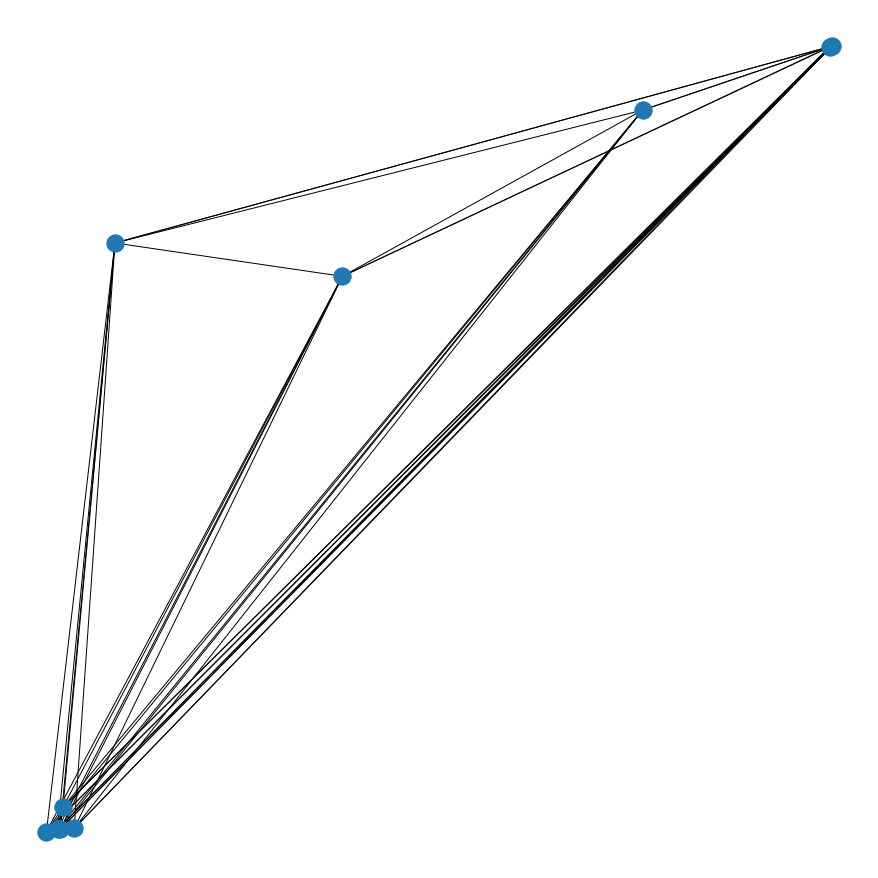

In [54]:
# Importation des coordonnées sous format CSV
import pandas as pd
import matplotlib.pyplot as plt

cities=pd.read_csv('coord.csv') 
#Le fichier qui nous a été donné (nous avons limité ce test à 10 villes seulement car l'algorithme a pris
#plus de 41 min seulement pour charger les distances entre chaque ville dans le fichier texte contenant 55 villes).

my_pos = { i : ( cities['lat'][i], cities['lng'][i] ) for i in G.nodes } # pos[i] = (x_i, y_i)
plt.figure(3,figsize=(12,12)) 
nx.draw(G,my_pos) 

In [55]:
import requests
import urllib.request
import time
import json
from bs4 import BeautifulSoup

#Scrapping the distancematrixApi pour trouver la distance réelle entre les villes
for i,j in G.edges:
    url='https://api.distancematrix.ai/maps/api/distancematrix/json?origins='+str(cities['lat'][i])+','
    +str(cities['lng'][i])+'&destinations='+lat_dest+','+long_dest+'&key=7yiVUavyBZ2Ph0hKvA9UzEaBa9PVI'
    response=requests.get(url)
    rsp=response.content
    soup=BeautifulSoup(response.text,"html.parser")
    e=soup.text 
    index = e.find("distance")
    res=e[index+19:].split()[0]
    G.edges[i,j]['length'] = res

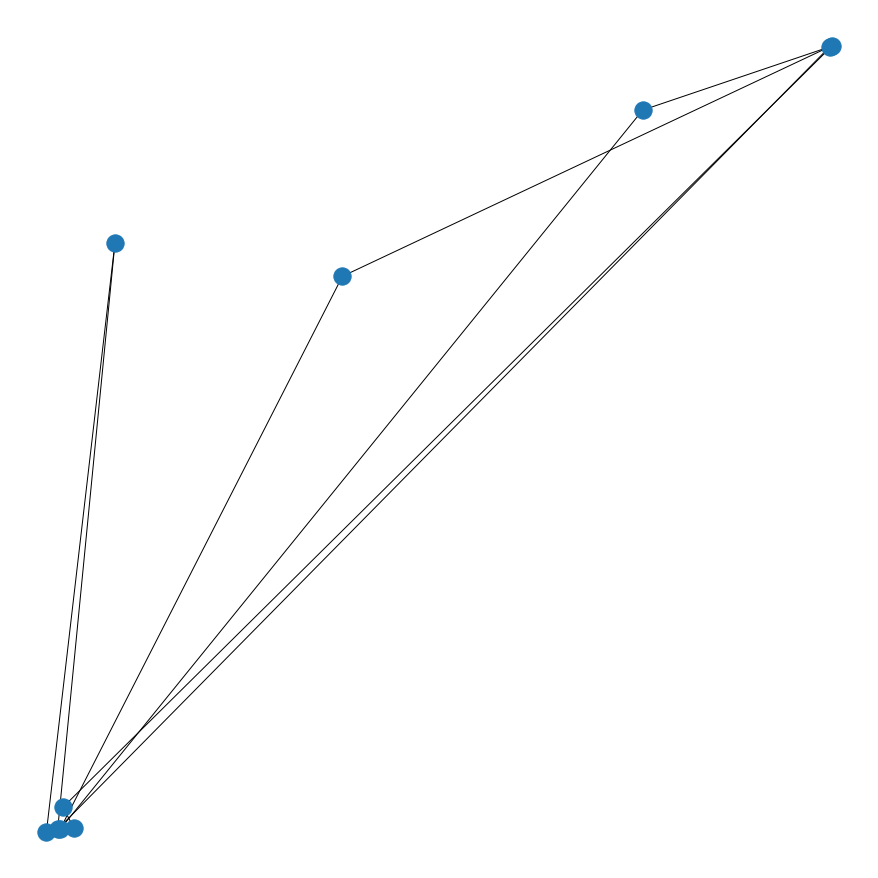

In [56]:
# Choisissez un tour arbitraire, dans ce cas (0,1,2,...,n-1).
tour = list(G.nodes)
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
plt.figure(3,figsize=(12,12)) 
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

swapping edges (1, 2) (4, 5) with (1, 4) (2, 5)
swapping edges (1, 4) (5, 6) with (1, 5) (4, 6)
swapping edges (5, 2) (3, 4) with (5, 3) (2, 4)
swapping edges (3, 2) (4, 6) with (3, 4) (2, 6)


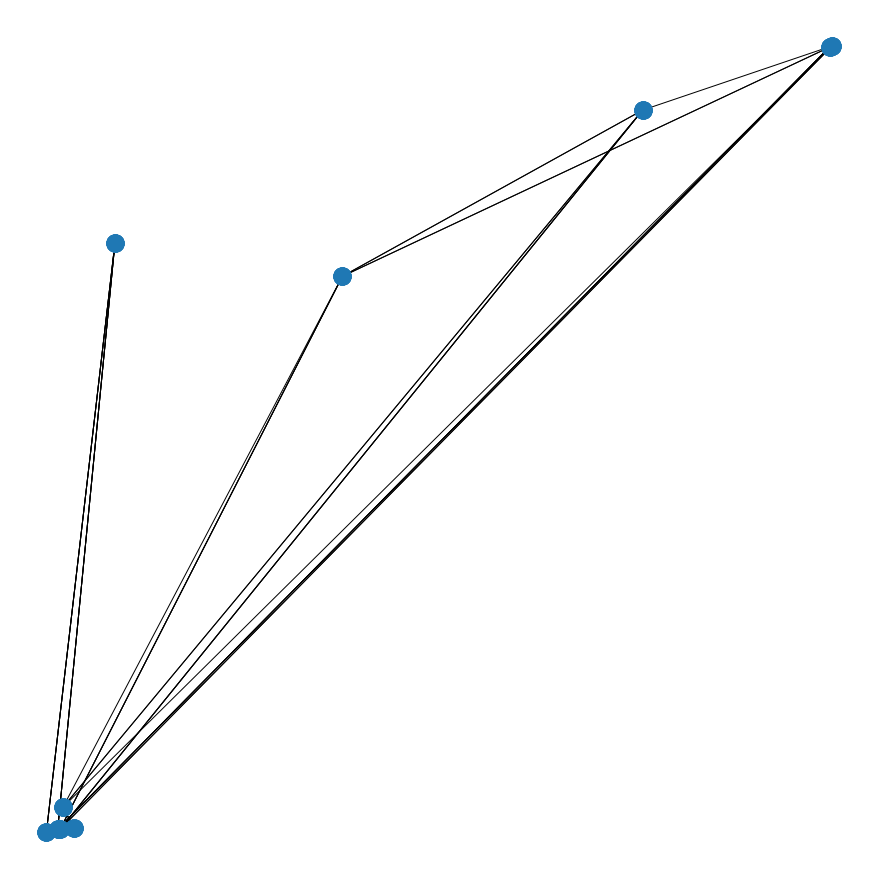

In [57]:
import matplotlib.pyplot as plt

improved = True
while improved:
    improved = False
    for i in range(n):
        for j in range(i+1,n):
            
            # deux bords actuels de la tournée
            cur1 = (tour[i],tour[i+1])
            cur2 = (tour[j],tour[(j+1)%n])
            cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']
            
            # deux "nouveaux" bords pour la tournée
            new1 = (tour[i],tour[j])
            new2 = (tour[i+1],tour[(j+1)%n])
            new_length = G.edges[new1]['length'] + G.edges[new2]['length']
            
            # mettre à jour le tour, si amélioré
            if new_length < cur_length:
                print("swapping edges",cur1,cur2,"with",new1,new2)
                tour[i+1:j+1] = tour[i+1:j+1][::-1]
                improved = True
                
                # Dessinez le nouveau tour
                tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
                plt.figure(3,figsize=(12,12))
                nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)
                


Final tour: [0, 3, 1, 2, 4, 6, 5, 7, 8, 9]


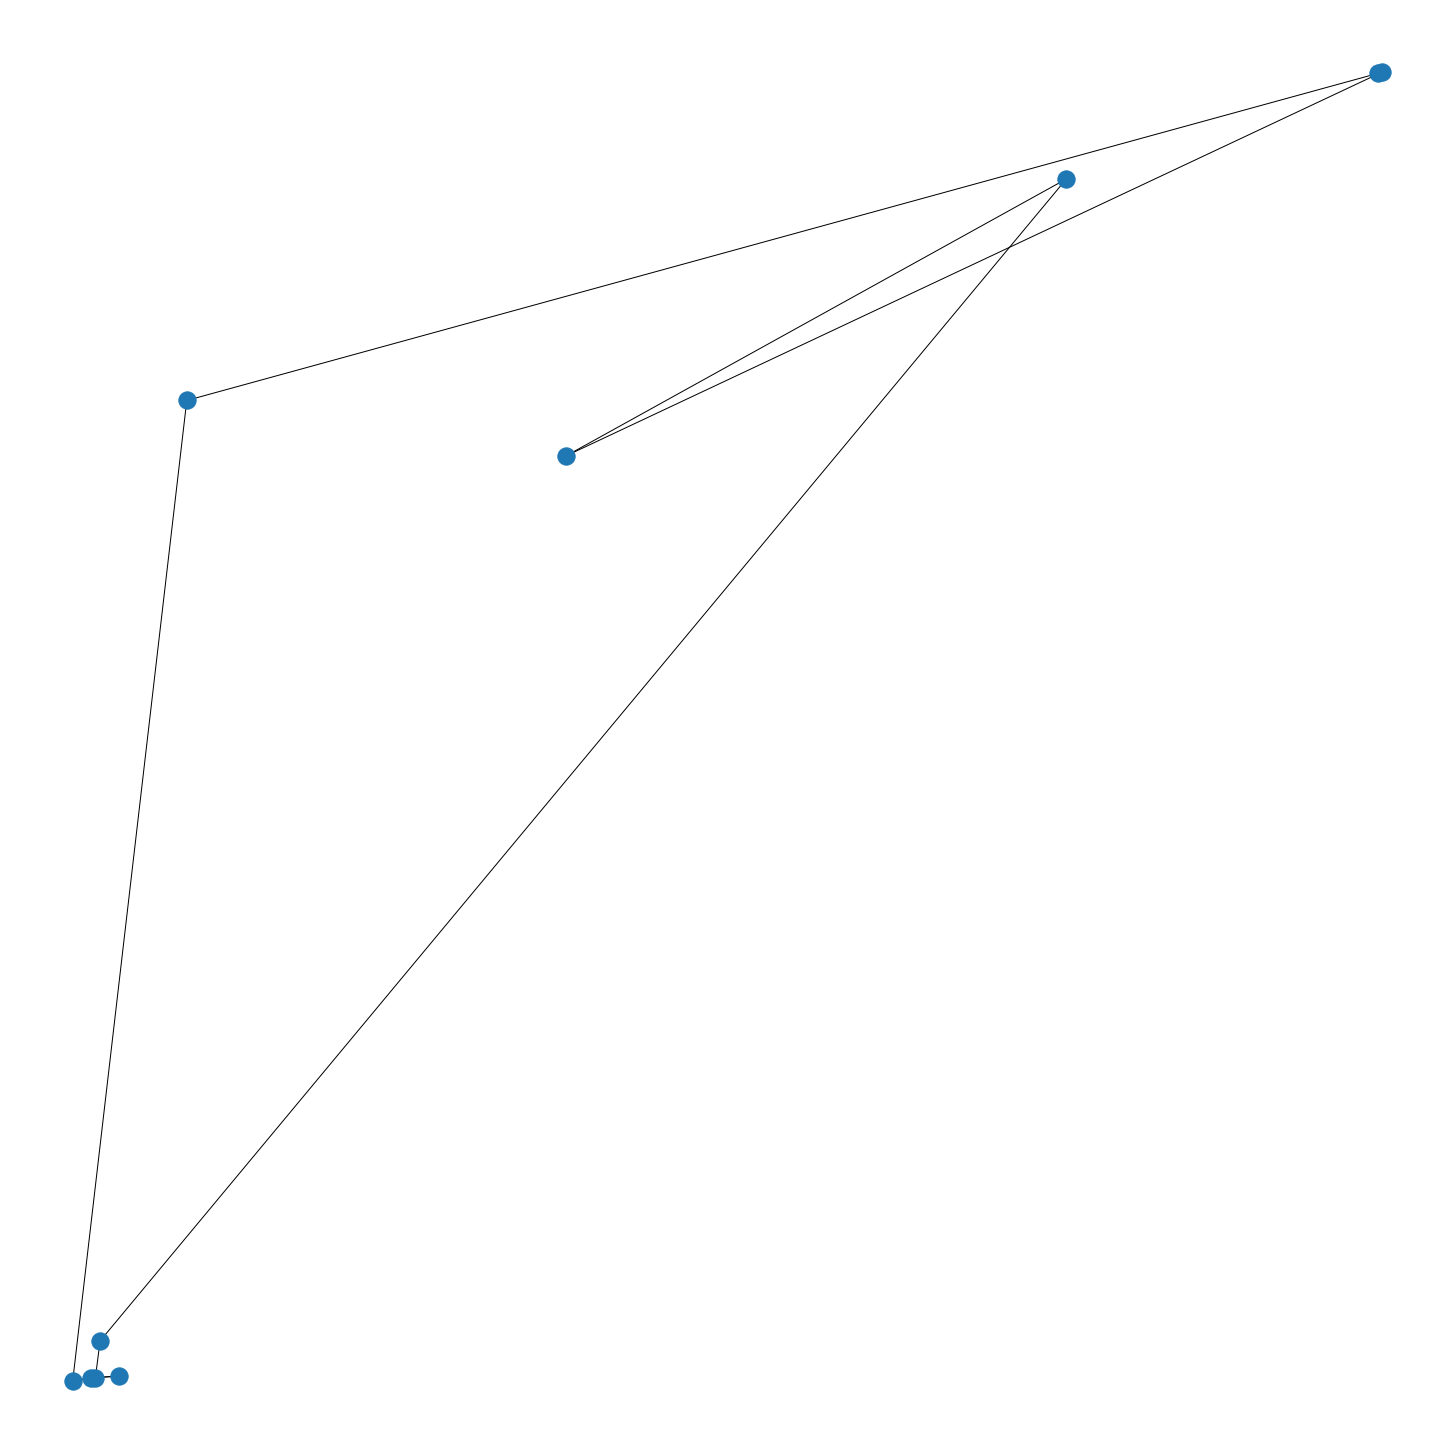

In [52]:
#Montrer le tout optimal
print("Final tour:",tour)
tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
plt.figure(3,figsize=(20,20))
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)